# 미국에서 연재하는 한국 작품에 대한 EDA
## 목표
- 미국 연재 순위에 영향을 주는 변수 파악
- 변수 별 분포 파악

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 한글 폰트 깨짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Users/Jung_a/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# 1. 데이터 불러오기

df = pd.read_csv("data/data.csv")

In [4]:
## 1.1 필요없는 칼럼 제거
df.drop(["Unnamed: 0"],inplace=True,axis=1)

In [5]:
## 1.2 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          92 non-null     object 
 1   week           92 non-null     object 
 2   rank           92 non-null     int64  
 3   star_mean      92 non-null     float64
 4   large_genre    92 non-null     object 
 5   small_genre    92 non-null     object 
 6   heart          92 non-null     int64  
 7   isnovel        92 non-null     int64  
 8   america_title  92 non-null     object 
 9   america_rank   92 non-null     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 7.3+ KB


In [6]:
df.head()

,title,week,rank,star_mean,large_genre,small_genre,heart,isnovel,america_title,america_rank
0,참교육,mon,1,9.86,스토리,액션,20645,0,Get Schooled,8
1,신화급 귀속,mon,7,9.88,스토리,판타지,477,1,Mythic Item Obtained,13
2,소녀의 세계,mon,13,9.93,스토리,드라마,99999,0,Odd Girl Out,11
3,북부 공작님을,mon,20,9.96,스토리,로맨스,535,1,Charming the Duke of the North,22
4,꼬리잡기,mon,21,9.94,스토리,스릴러,1491,0,Chasing Tails,40


In [7]:
df.describe()

,rank,star_mean,heart,isnovel,america_rank
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,28.510870,9.856630,15417.315217,0.543478,25.543478
std,22.627657,0.240651,32502.093828,0.500835,19.033466
min,1.000000,8.390000,23.000000,0.000000,1.000000
25%,11.000000,9.870000,432.000000,0.000000,10.000000
50%,21.000000,9.945000,1003.500000,1.000000,20.500000
75%,44.250000,9.962500,2939.500000,1.000000,39.250000
max,80.000000,9.990000,99999.000000,1.000000,70.000000


# 2. 변수 별 분포 파악하기
## 2.1 week

fri    15
sat    15
thu    14
mon    13
tue    13
wed    13
sun     9
Name: week, dtype: int64


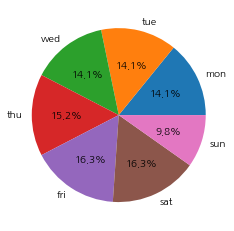

In [8]:
print(df["week"].value_counts())
plt.pie(df["week"].value_counts(sort=False),labels=df["week"].unique(), autopct='%0.1f%%')
plt.show()

week
fri    9.918000
mon    9.853846
sat    9.818000
sun    9.944444
thu    9.895714
tue    9.693077
wed    9.893846
Name: star_mean, dtype: float64


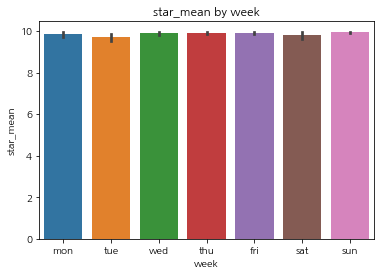

In [9]:
### week별 별점 평균
sns.barplot(x='week',y='star_mean',data=df)
plt.title("star_mean by week")
print(df.groupby('week')["star_mean"].mean())

           mean  max  min
week                     
fri   26.733333   77    3
mon   36.000000   80    1
sat   37.333333   73    1
sun   27.222222   76    3
thu   26.785714   80    1
tue   24.307692   72    1
wed   19.846154   56    1


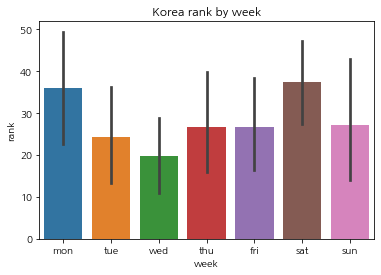

In [20]:
### week별 한국 순위 평균

sns.barplot(x='week',y='rank',data=df)
plt.title("Korea rank by week")
print(df.groupby('week')["rank"].agg(["mean","max","min"]))

           mean  max  min
week                     
fri   30.133333   70    1
mon   24.076923   54    8
sat   24.000000   56    3
sun   29.555556   66    2
thu   22.428571   52    7
tue   24.307692   65    1
wed   25.307692   64    1


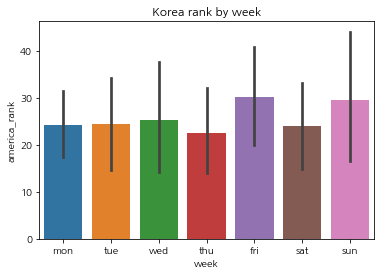

In [21]:
### week 별 미국 순위 평균
sns.barplot(x='week',y='america_rank',data=df)
plt.title("Korea rank by week")
print(df.groupby('week')["america_rank"].agg(["mean","max","min"]))

              mean    max  min
week                          
fri    8293.800000  74107  151
mon    9960.769231  99999  132
sat    7662.933333  99999   95
sun   13719.222222  99999  420
thu   16849.571429  99999  279
tue   23124.384615  99999   23
wed   29966.769231  99999  189


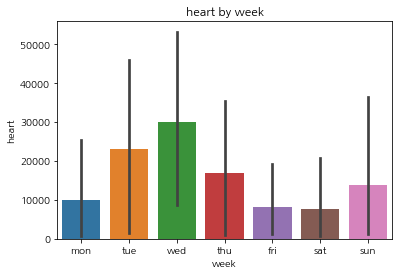

In [14]:
### week별 하트 수 평균

sns.barplot(x='week',y='heart',data=df)
plt.title("heart by week")
print(df.groupby('week')["heart"].agg(["mean","max","min"]))

week  isnovel
fri   1          9
      0          6
mon   1          7
      0          6
sat   1          8
      0          7
sun   0          5
      1          4
thu   1          9
      0          5
tue   1          7
      0          6
wed   0          7
      1          6
Name: isnovel, dtype: int64


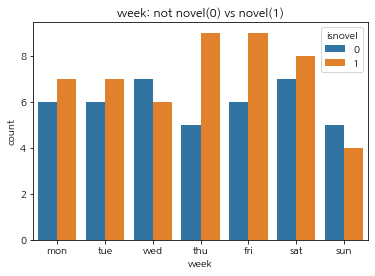

In [16]:
### week 별 소설 원작 분포
print(df.groupby('week')["isnovel"].value_counts())
sns.countplot('week',hue='isnovel',data=df)
plt.title("week: not novel(0) vs novel(1)")
plt.show()

week  large_genre
fri   스토리            15
mon   스토리            13
sat   스토리            14
      옴니버스            1
sun   스토리             8
      옴니버스            1
thu   스토리            14
tue   스토리            13
wed   스토리            13
Name: large_genre, dtype: int64


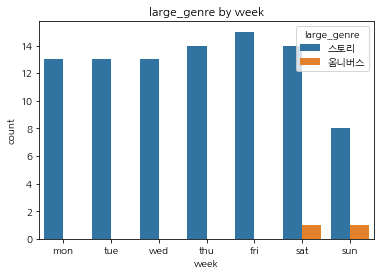

In [17]:
### week 별 대장르 분포
print(df.groupby('week')["large_genre"].value_counts())
sns.countplot('week',hue='large_genre',data=df)
plt.title("large_genre by week")
plt.show()

## 2.2 Rank

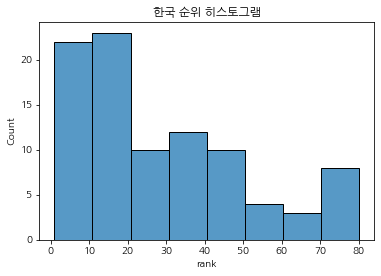

In [34]:
sns.histplot(data=df, x="rank")
plt.title("한국 순위 히스토그램")
plt.show()

In [33]:
df["rank"].agg(["mean","max","min"])

mean    28.51087
max     80.00000
min      1.00000
Name: rank, dtype: float64

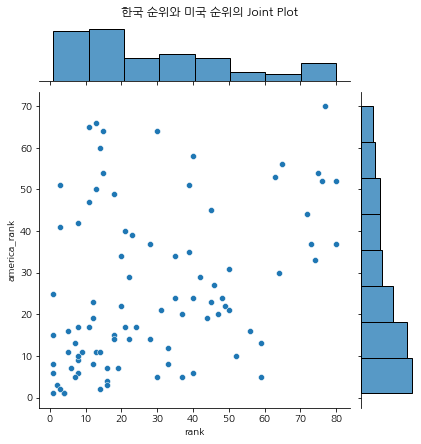

In [75]:
sns.jointplot(x="rank", y="america_rank", data=df)
plt.suptitle("한국 순위와 미국 순위의 Joint Plot", y=1.02)
plt.show()

## 2.3  America_rank

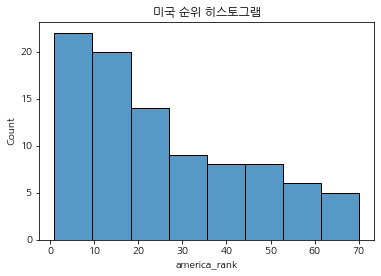

In [36]:
sns.histplot(data=df, x="america_rank")
plt.title("미국 순위 히스토그램")
plt.show()

In [78]:
df["america_rank"].agg(["mean","max","min"])

mean    25.543478
max     70.000000
min      1.000000
Name: america_rank, dtype: float64

## 2.4 star_mean

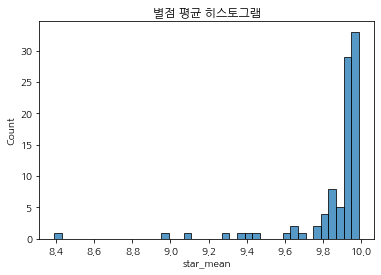

mean    9.85663
max     9.99000
min     8.39000
Name: star_mean, dtype: float64


In [39]:
sns.histplot(data=df, x="star_mean")
plt.title("별점 평균 히스토그램")
plt.show()
print(df["star_mean"].agg(["mean","max","min"]))

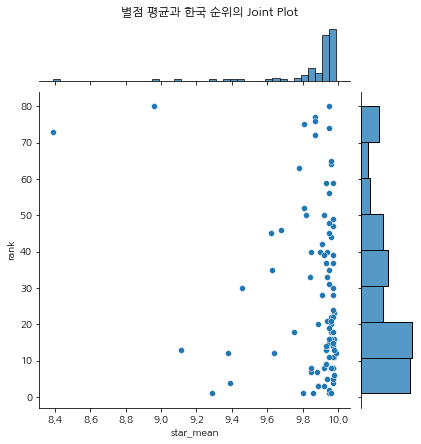

In [71]:
sns.jointplot(x="star_mean", y="rank", data=df)
plt.suptitle("별점 평균과 한국 순위의 Joint Plot", y=1.02)
plt.show()

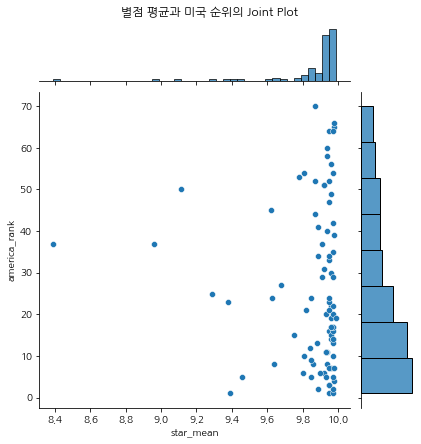

In [72]:
sns.jointplot(x="star_mean", y="america_rank", data=df)
plt.suptitle("별점 평균과 미국 순위의 Joint Plot", y=1.02)
plt.show()

## 2.5 heart

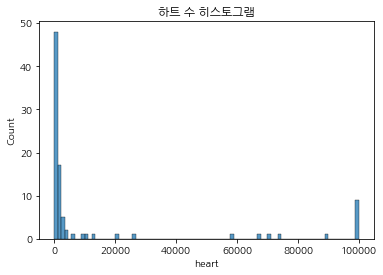

mean    15417.315217
max     99999.000000
min        23.000000
Name: heart, dtype: float64


In [44]:
sns.histplot(data=df, x="heart")
plt.title("하트 수 히스토그램")
plt.show()
print(df["heart"].agg(["mean","max","min"]))

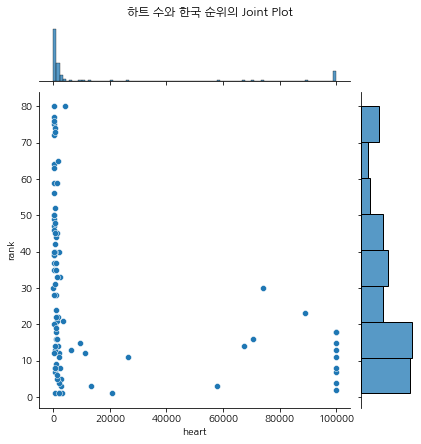

In [73]:
sns.jointplot(x="heart", y="rank", data=df)
plt.suptitle("하트 수와 한국 순위의 Joint Plot", y=1.02)
plt.show()

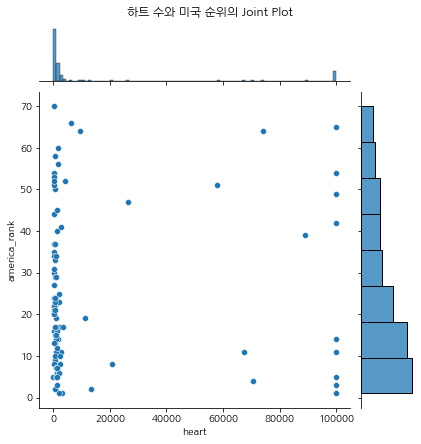

In [74]:
sns.jointplot(x="heart", y="america_rank", data=df)
plt.suptitle("하트 수와 미국 순위의 Joint Plot", y=1.02)
plt.show()

## 2.6 large_genre

스토리     90
옴니버스     2
Name: large_genre, dtype: int64


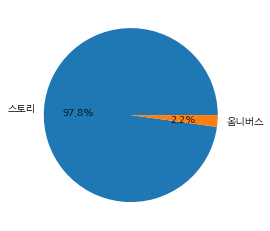

In [64]:
print(df["large_genre"].value_counts())
plt.pie(df["large_genre"].value_counts(sort=False),labels=df["large_genre"].unique(), autopct='%0.1f%%')
plt.show()

## 2.7 small_genre

로맨스      38
판타지      28
드라마      10
액션        8
무협/사극     4
스릴러       2
감성        1
스포츠       1
Name: small_genre, dtype: int64


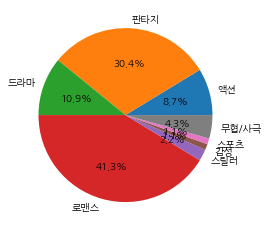

In [62]:
print(df["small_genre"].value_counts())
plt.pie(df["small_genre"].value_counts(sort=False),labels=df["small_genre"].unique(), autopct='%0.1f%%')
plt.show()

small_genre
감성       9.810000
드라마      9.946000
로맨스      9.928158
무협/사극    9.932500
스릴러      9.945000
스포츠      9.970000
액션       9.741250
판타지      9.741071
Name: star_mean, dtype: float64


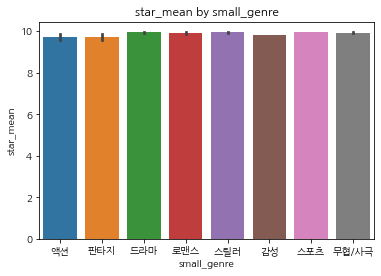

In [49]:
### 장르별 별점 평균
sns.barplot(x='small_genre',y='star_mean',data=df)
plt.title("star_mean by small_genre")
print(df.groupby('small_genre')["star_mean"].mean())

                     mean    max    min
small_genre                            
감성             132.000000    132    132
드라마          32244.400000  99999    321
로맨스          14840.052632  99999    205
무협/사극        15363.750000  57943    295
스릴러           1118.500000   1491    746
스포츠          99999.000000  99999  99999
액션           17307.875000  99999     95
판타지           8205.035714  99999     23


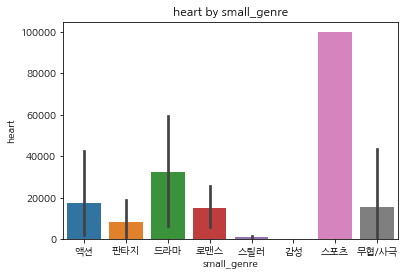

In [50]:
### 장르별 하트 수

sns.barplot(x='small_genre',y='heart',data=df)
plt.title("heart by small_genre")
print(df.groupby('small_genre')["heart"].agg(["mean","max","min"]))

                  mean  max  min
small_genre                     
감성           75.000000   75   75
드라마          31.400000   80    1
로맨스          29.815789   77    1
무협/사극        19.750000   48    3
스릴러          47.500000   74   21
스포츠           8.000000    8    8
액션           22.500000   63    1
판타지          26.392857   80    1


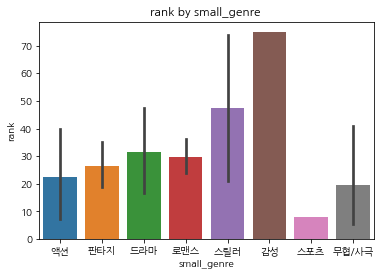

In [51]:
### 장르별 한국 순위 

sns.barplot(x='small_genre',y='rank',data=df)
plt.title("rank by small_genre ")
print(df.groupby('small_genre')["rank"].agg(["mean","max","min"]))

                  mean  max  min
small_genre                     
감성           54.000000   54   54
드라마          33.600000   54   11
로맨스          21.842105   70    1
무협/사극        29.750000   51   10
스릴러          36.500000   40   33
스포츠          42.000000   42   42
액션           19.000000   53    2
판타지          26.571429   66    3


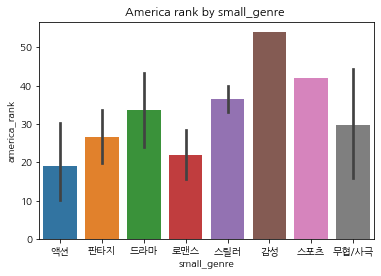

In [52]:
### 장르별 미국 순위 

sns.barplot(x='small_genre',y='america_rank',data=df)
plt.title("America rank by small_genre ")
print(df.groupby('small_genre')["america_rank"].agg(["mean","max","min"]))

small_genre  isnovel
감성           1           1
드라마          1           6
             0           4
로맨스          0          19
             1          19
무협/사극        1           4
스릴러          0           2
스포츠          0           1
액션           0           6
             1           2
판타지          1          18
             0          10
Name: isnovel, dtype: int64


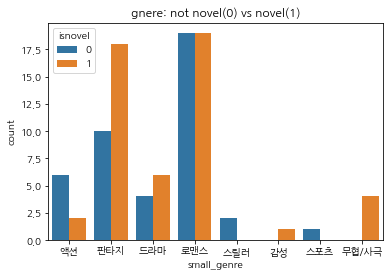

In [48]:
### 장르별 소설 원작 분포
print(df.groupby('small_genre')["isnovel"].value_counts())
sns.countplot('small_genre',hue='isnovel',data=df)
plt.title("gnere: not novel(0) vs novel(1)")
plt.show()

## 2.8 Isnovel
- 0이면 소설 원작이 아닌 웹툰, 1이면 소설 원작인 웹툰

1    50
0    42
Name: isnovel, dtype: int64


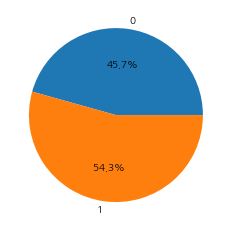

In [65]:
print(df["isnovel"].value_counts())
plt.pie(df["isnovel"].value_counts(sort=False),labels=df["isnovel"].unique(), autopct='%0.1f%%')
plt.show()

isnovel
0    9.883571
1    9.834000
Name: star_mean, dtype: float64


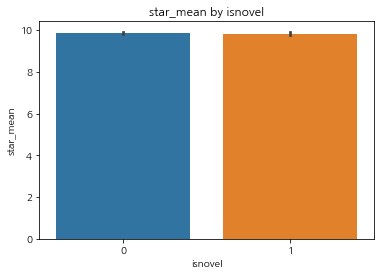

In [66]:
### 소설 원작 여부별 별점 평균
sns.barplot(x='isnovel',y='star_mean',data=df)
plt.title("star_mean by isnovel")
print(df.groupby('isnovel')["star_mean"].mean())

                 mean    max  min
isnovel                          
0        24318.428571  99999   95
1         7940.380000  99999   23


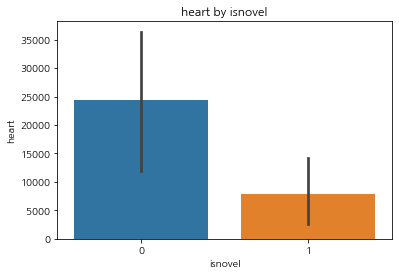

In [67]:
### 소설 원작 여부별 하트 수

sns.barplot(x='isnovel',y='heart',data=df)
plt.title("heart by isnovel")
print(df.groupby('isnovel')["heart"].agg(["mean","max","min"]))

             mean  max  min
isnovel                    
0        29.02381   80    1
1        28.08000   80    1


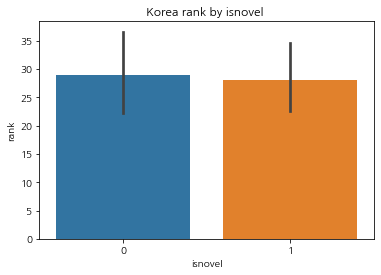

In [68]:
### 소설 원작 여부별 한국 순위 

sns.barplot(x='isnovel',y='rank',data=df)
plt.title("Korea rank by isnovel ")
print(df.groupby('isnovel')["rank"].agg(["mean","max","min"]))

             mean  max  min
isnovel                    
0        26.97619   70    1
1        24.34000   64    1


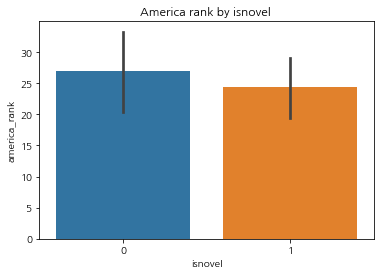

In [70]:
### 소설 원작 여부별 미국 순위 

sns.barplot(x='isnovel',y='america_rank',data=df)
plt.title("America rank by isnovel ")
print(df.groupby('isnovel')["america_rank"].agg(["mean","max","min"]))

In [11]:
df[df["rank"] >= 10]["isnovel"].value_counts()

1    38
0    32
Name: isnovel, dtype: int64

# 3. 변수 간 상관 관계

<AxesSubplot:>

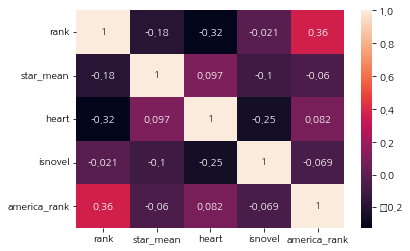

In [77]:
sns.heatmap(df.corr(), annot = True) 